In [1]:
# coding:utf-8
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [2]:
def pca(data, n_dim):
    '''
    pca is O(D^3)
    :param data: (n_samples, n_features(D))
    :param n_dim: target dimensions
    :return: (n_samples, n_dim)
    '''
    data = data - np.mean(data, axis = 0, keepdims = True)

    cov = np.dot(data.T, data)

    eig_values, eig_vector = np.linalg.eig(cov)
    # print(eig_values)
    indexs_ = np.argsort(-eig_values)[:n_dim]
    picked_eig_values = eig_values[indexs_]
    picked_eig_vector = eig_vector[:, indexs_]
    data_ndim = np.dot(data, picked_eig_vector)
    return data_ndim


# data 降维的矩阵(n_samples, n_features)
# n_dim 目标维度
# fit n_features >> n_samples, reduce cal


In [3]:
def highdim_pca(data, n_dim):
    '''
    when n_features(D) >> n_samples(N), highdim_pca is O(N^3)
    :param data: (n_samples, n_features)
    :param n_dim: target dimensions
    :return: (n_samples, n_dim)
    '''
    N = data.shape[0]
    data = data - np.mean(data, axis = 0, keepdims = True)

    Ncov = np.dot(data, data.T)

    Neig_values, Neig_vector = np.linalg.eig(Ncov)
    indexs_ = np.argsort(-Neig_values)[:n_dim]
    Npicked_eig_values = Neig_values[indexs_]
    # print(Npicked_eig_values)
    Npicked_eig_vector = Neig_vector[:, indexs_]
    # print(Npicked_eig_vector.shape)

    picked_eig_vector = np.dot(data.T, Npicked_eig_vector)
    picked_eig_vector = picked_eig_vector/(N*Npicked_eig_values.reshape(-1, n_dim))**0.5
    # print(picked_eig_vector.shape)

    data_ndim = np.dot(data, picked_eig_vector)
    return data_ndim



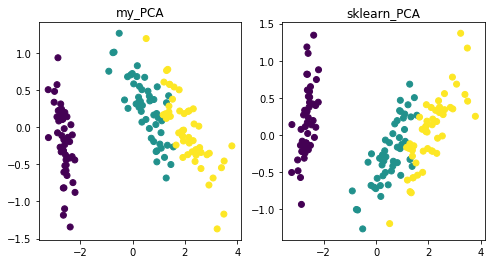

In [4]:
if __name__ == "__main__":
    data = load_iris()
    X = data.data
    Y = data.target
    data_2d1 = pca(X, 2)
    plt.figure(figsize=(8,4))
    plt.subplot(121)
    plt.title("my_PCA")
    plt.scatter(data_2d1[:, 0], data_2d1[:, 1], c = Y)

    sklearn_pca = PCA(n_components=2)
    data_2d2 = sklearn_pca.fit_transform(X)
    plt.subplot(122)
    plt.title("sklearn_PCA")
    plt.scatter(data_2d2[:, 0], data_2d2[:, 1], c = Y)
    plt.show()